In [1]:
from __future__ import division
import numpy as np
from materials import vac, Al, GB
from microscope import Microscope
from bulkMode import bulk_NR
from twoSlabParallel import twoSlabParallel_NR, twoSlabParallel, twoSlabParallel_2, dispersion
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Initial varibales

In [2]:
c = 3E8 #[m/s]
hbar=6.582E-16#[eV s]

Set dimmensions

In [42]:
x = np.array([-40, 0, 40])*1E-10#np.arange(-5,0,0.5)*1E-10 #[m]
q_perpendicular = np.arange(0,200,1)*1E6
E = np.arange(13,17,0.03)

x = x[:,np.newaxis,np.newaxis]
q_perpendicular = q_perpendicular[np.newaxis,:,np.newaxis]
E = E[np.newaxis,np.newaxis,:]

Set materials

In [43]:
materials = [Al,GB()]#[Al,vac]#
for material in materials:
    print(material.name)
    print('n: ',material.n,'[e-/m^3]')
    material.set_Ep(type='Drude')
    print(material.E_p0)
    material.set_eps(E=E,type='Drude')
    print('')
#print(materials[1].eps.shape)
#materials[1].eps = np.ones_like(materials[1].eps)*(4+0j)
#print(materials[1].eps)

Al
n:  1.8117722802e+29 [e-/m^3]
Setting E_p
15.8067058407
Setting eps

GB
n:  1.68381104041e+29 [e-/m^3]
Setting E_p
15.2382902765
Setting eps



Set microscope

In [44]:
microscope = Microscope(keV=300)
microscope.print_parameters()

Microscope
  keV :  300
  gamma :  1.5870841487279843
  beta2 :  0.6029912379261115
  v :  232957531.351
  T :  154304.780267
  k0 :  3.19429261034e+12
  resolution :  0.05
  dispersion :  0.05
  collection_angle :  0.002



# Plotting

In [45]:
pos_index= 0

dielectric funciton

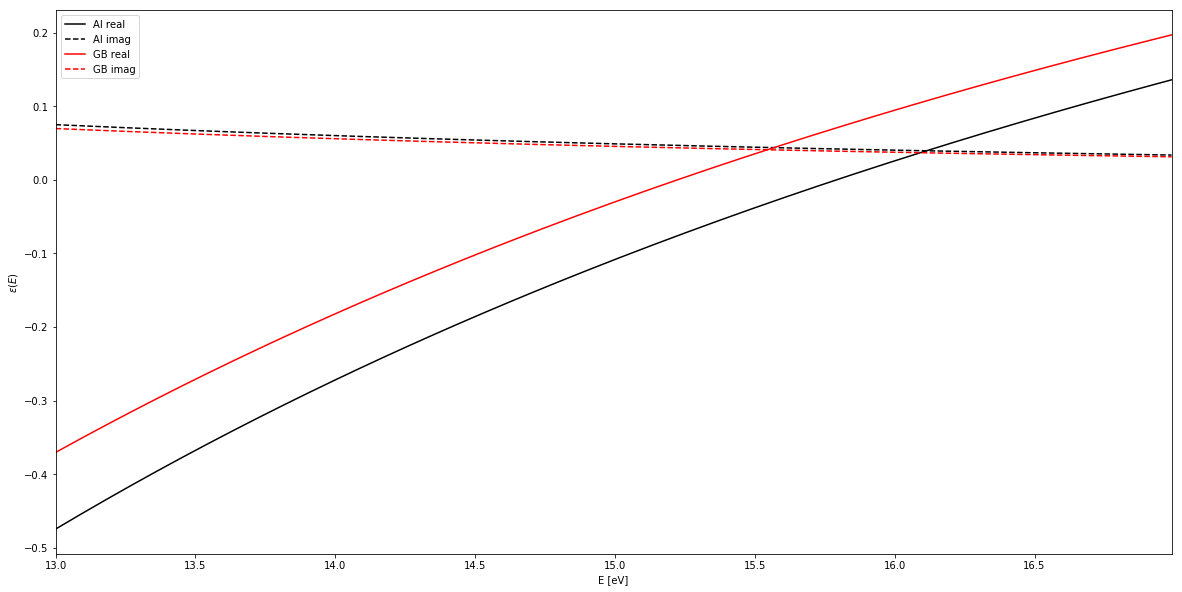

In [46]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,0,:],np.real(materials[0].eps[0,0,:]), '-k', label='Al real')
ax.plot(E[0,0,:],np.imag(materials[0].eps[0,0,:]), '--k', label='Al imag')
ax.plot(E[0,0,:],np.real(materials[1].eps[0,0,:]), '-r', label='GB real')
ax.plot(E[0,0,:],np.imag(materials[1].eps[0,0,:]), '--r', label='GB imag')
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon(E)$')
ax.set_xlim(xmin=3)
plt.autoscale(enable=True, axis='x', tight=True)
ax.legend()
plt.show()

In [41]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/eps.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

In [19]:
epsSumReal = np.real(materials[0].eps[0,0,:])+np.real(materials[1].eps[0,0,:])
nearZero=(np.abs(epsSumReal)).argmin()
print(epsSumReal[nearZero-1:nearZero+2])
print(E[0,0,nearZero-1:nearZero+2])

[-0.00543333  0.00229816  0.00998505]
[ 15.49  15.52  15.55]


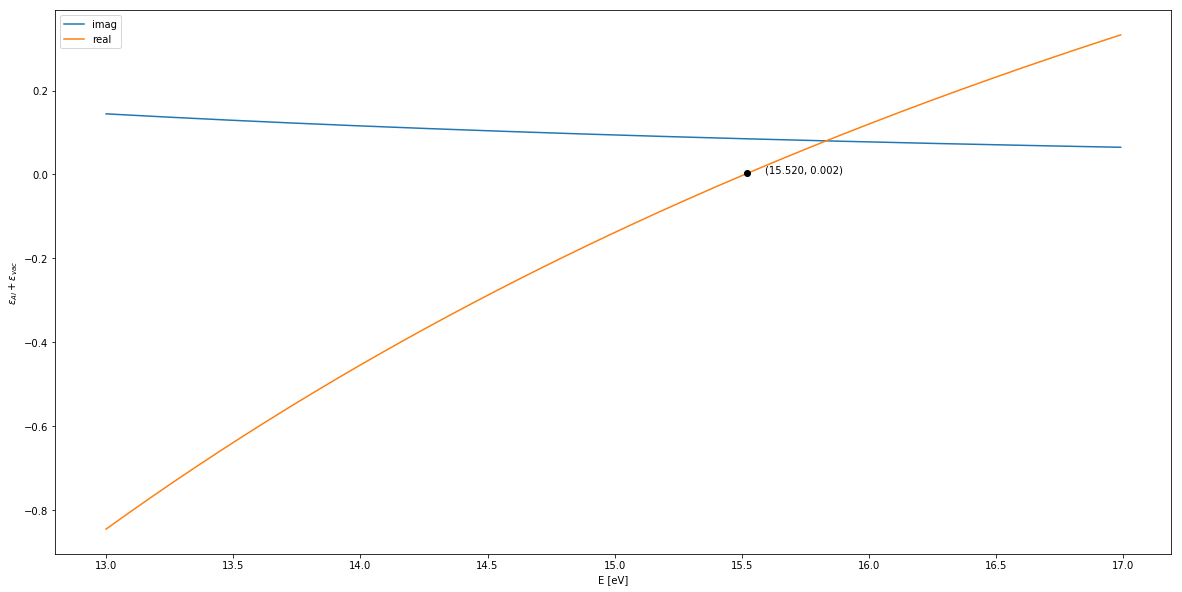

In [38]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(E[0,0,:], np.imag(materials[0].eps[0,0,:])+np.imag(materials[1].eps[0,0,:]), label='imag')
ax.plot(E[0,0,:], np.real(materials[0].eps[0,0,:])+np.real(materials[1].eps[0,0,:]), label='real')
ax.plot([E[0,0,nearZero]],[epsSumReal[nearZero]],'ok')
ax.text(E[0,0,nearZero]+0.07,epsSumReal[nearZero],'({:0.3f}, {:0.3f})'.format(E[0,0,nearZero],epsSumReal[nearZero]))
ax.set_xlabel('E [eV]')
ax.set_ylabel(r'$\epsilon_{Al}+\epsilon_{vac}$')
ax.legend()
plt.show()

In [39]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/epsSum.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

Bulk

In [122]:
bulk = bulk_NR(microscope, material=materials,
                   x=x, q_perpendicular=q_perpendicular, E=E)

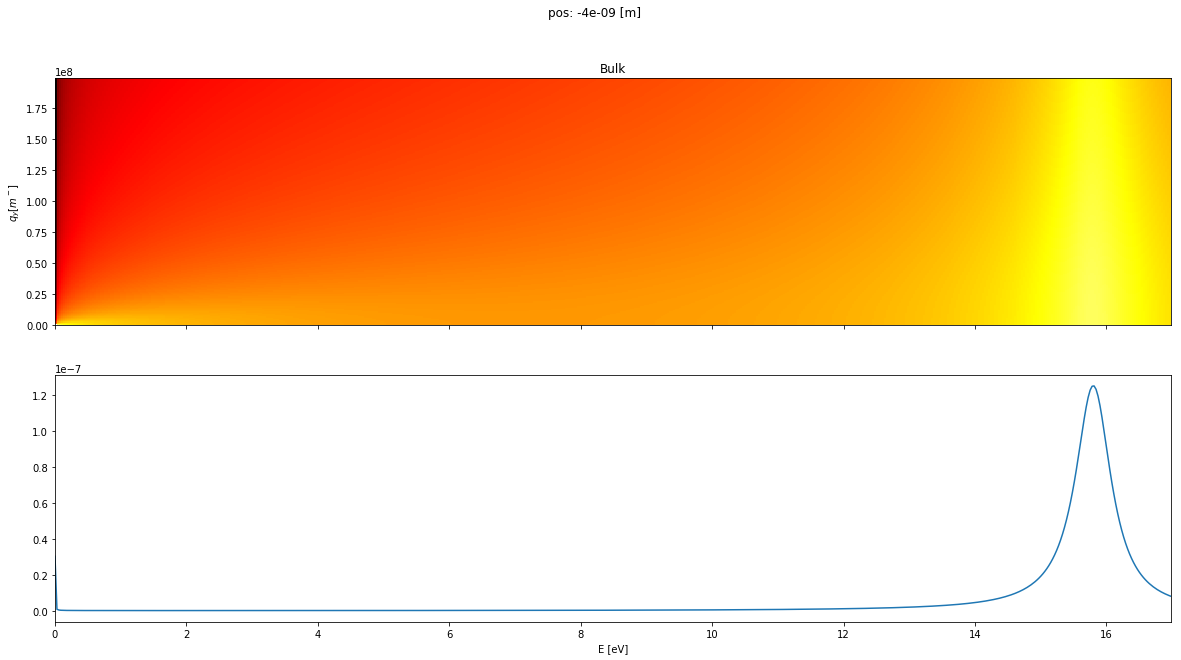

In [123]:
fig, ax = plt.subplots(2, figsize=(20,10), sharex=True)
fig.suptitle(r'pos: {} [m]'.format(x[pos_index,0,0]))
img0 = ax[0].imshow(bulk[pos_index,:,:], aspect='auto', origin='lower', norm=LogNorm(), cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax[0].set_title('Bulk')
ax[0].set_ylabel(r'$q_{y} [m^-]$')
#fig.colorbar(mappable=img0, ax=ax[0])
ax[0].set_aspect('auto')

ax[1].plot(E[0,0,:],bulk[pos_index,:,:].sum(axis=0))
ax[1].set_xlim(xmin=0)
plt.autoscale(enable=True, axis='x', tight=True)
ax[1].set_xlabel('E [eV]')
#plt.tight_layout(pad=0.001)
plt.show()

In [31]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/bulk.jpg',
            transparent=True, bbox_inches='tight', dpi=800)

Non-Relativistic

In [124]:
interface, begrenzung = twoSlabParallel_NR(microscope, material=materials,
                   x=x, q_perpendicular=q_perpendicular, E=E)

In [125]:
light_line = q_perpendicular[0,:,0]*c*hbar, q_perpendicular

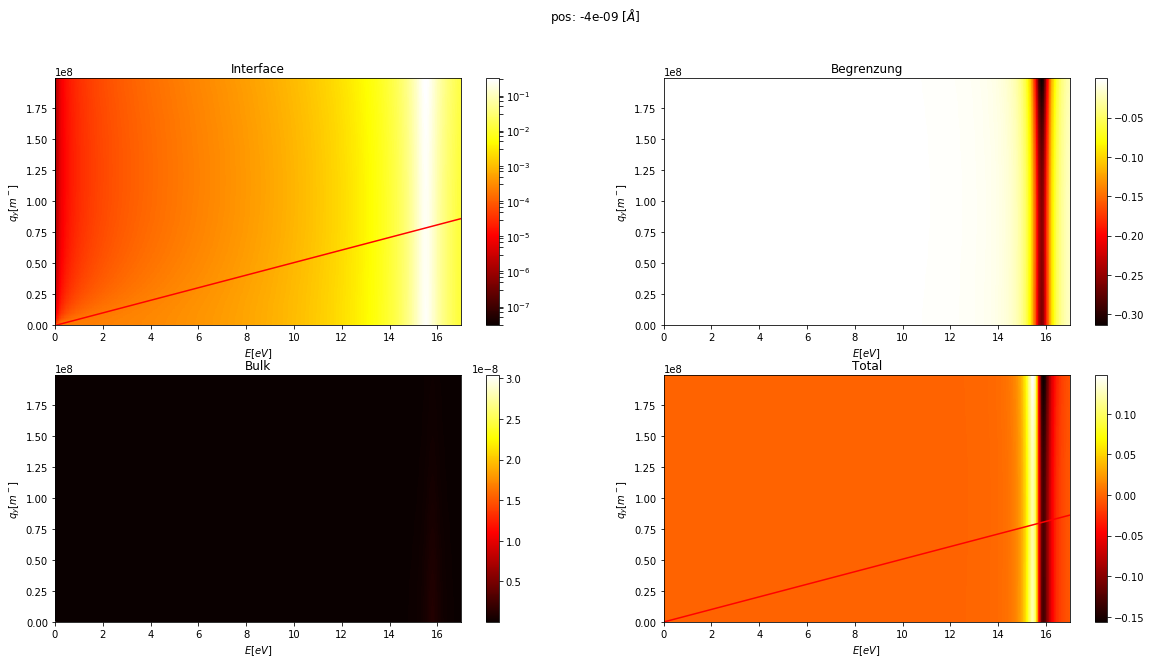

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle(r'pos: {} [$\AA$]'.format(x[pos_index,0,0]))

img0 = ax[0,0].imshow(interface[pos_index,:,:], aspect='auto', norm=LogNorm(), origin='lower', cmap=plt.get_cmap('hot'),
                 extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax[0,0].plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='red')
ax[0,0].set_title('Interface')
fig.colorbar(img0, ax=ax[0,0])

img1 = ax[0,1].imshow(begrenzung[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax[0,1].set_title('Begrenzung')
fig.colorbar(img1, ax=ax[0,1])

img2 = ax[1,0].imshow(bulk[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax[1,0].set_title('Bulk')
fig.colorbar(img2, ax=ax[1,0])

img3 = ax[1,1].imshow(bulk[pos_index,:,:]+begrenzung[pos_index,:,:]+interface[pos_index,:,:], aspect='auto', origin='lower',
                      cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax[1,1].plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='red')
ax[1,1].set_title('Total')
fig.colorbar(img3, ax=ax[1,1])

for each in ax.flatten():
    each.set_xlabel(r'$E [eV]$')
    each.set_xlim(np.amin(E),np.amax(E))
    each.set_ylabel(r'$q_{y} [m^-]$')

#plt.tight_layout()
plt.show()

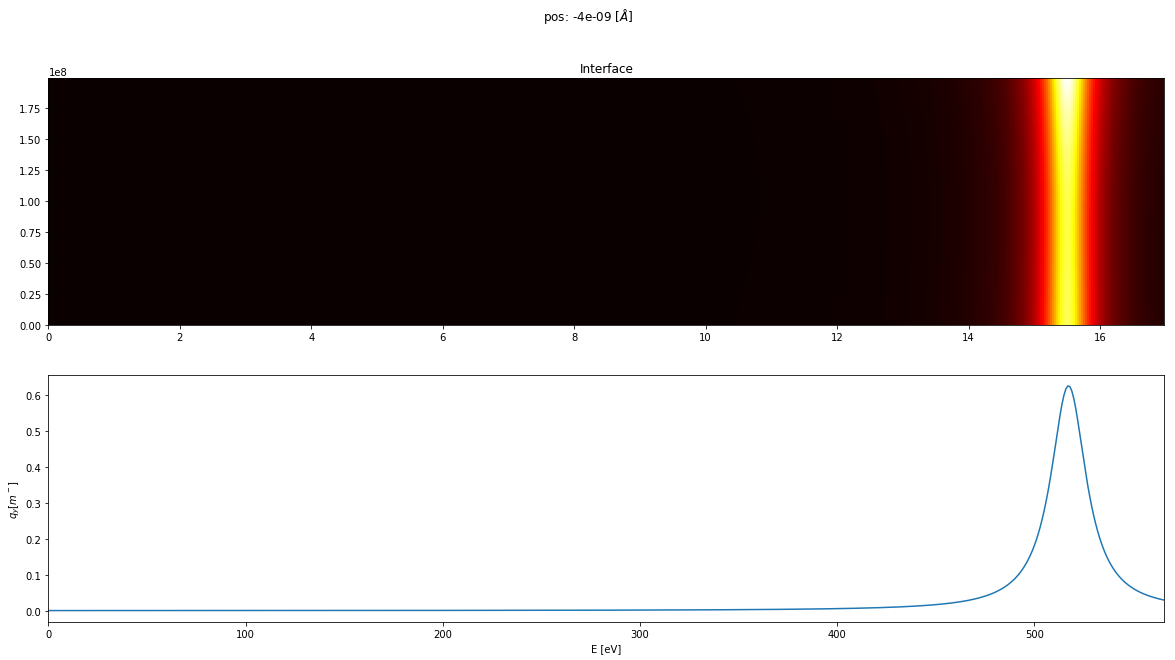

In [127]:
fig, ax = plt.subplots(2, figsize=(20,10))
fig.suptitle(r'pos: {} [$\AA$]'.format(x[pos_index,0,0]))
img0 = ax[0].imshow(interface[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax[0].set_title('Interface')
plt.xlabel('E [eV]')
plt.ylabel(r'$q_{y} [m^-]$')
#fig.colorbar(mappable=img0, ax=ax[0])

ax[1].plot(interface[:,pos_index,:].sum(axis=0))
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

Relativistic

In [147]:
interface_s, interface_p = twoSlabParallel(microscope, material=materials,
                   x=x, q_perpendicular=q_perpendicular, E=E)

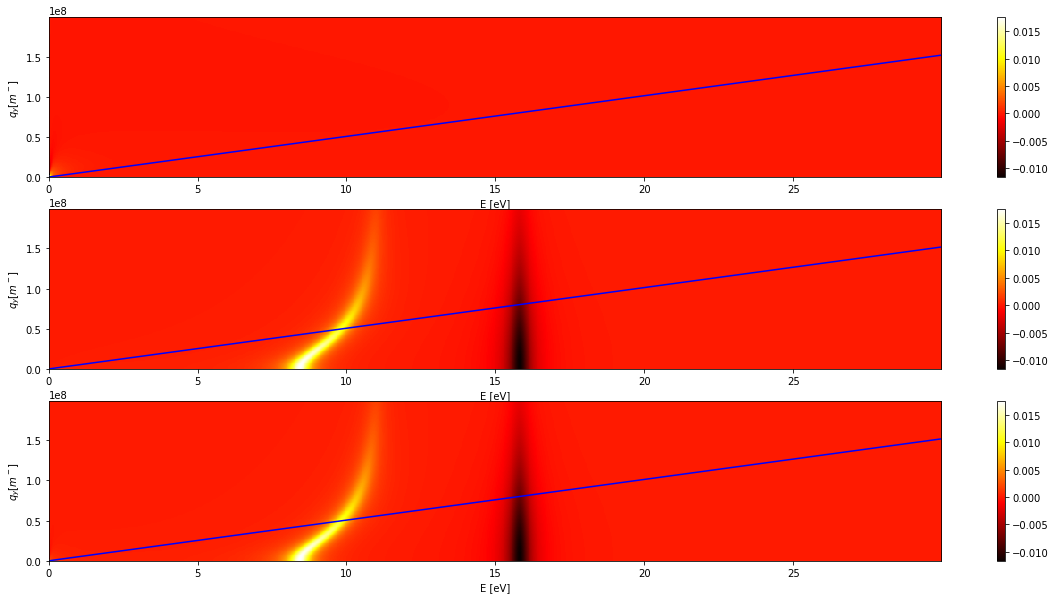

In [148]:
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20,10))
img1 = ax1.imshow(interface_s[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
                 extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax1.set_xlabel('E [eV]')
ax1.set_ylabel(r'$q_{y} [m^-]$')
ax1.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='blue')
fig.colorbar(img1, ax=ax1)
ax1.set_xlim(np.amin(E),np.amax(E))

img2 = ax2.imshow(interface_p[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax2.set_xlabel('E [eV]')
ax2.set_ylabel(r'$q_{y} [m^-]$')
ax2.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='blue')
fig.colorbar(img1, ax=ax2)
ax2.set_xlim(np.amin(E),np.amax(E))

img3 = ax3.imshow(interface_s[pos_index,:,:]+interface_p[pos_index,:,:], aspect='auto', origin='lower',
                  cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax3.set_xlabel('E [eV]')
ax3.set_ylabel(r'$q_{y} [m^-]$')
ax3.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='blue')
fig.colorbar(img1, ax=ax3)
ax3.set_xlim(np.amin(E),np.amax(E))

plt.show()

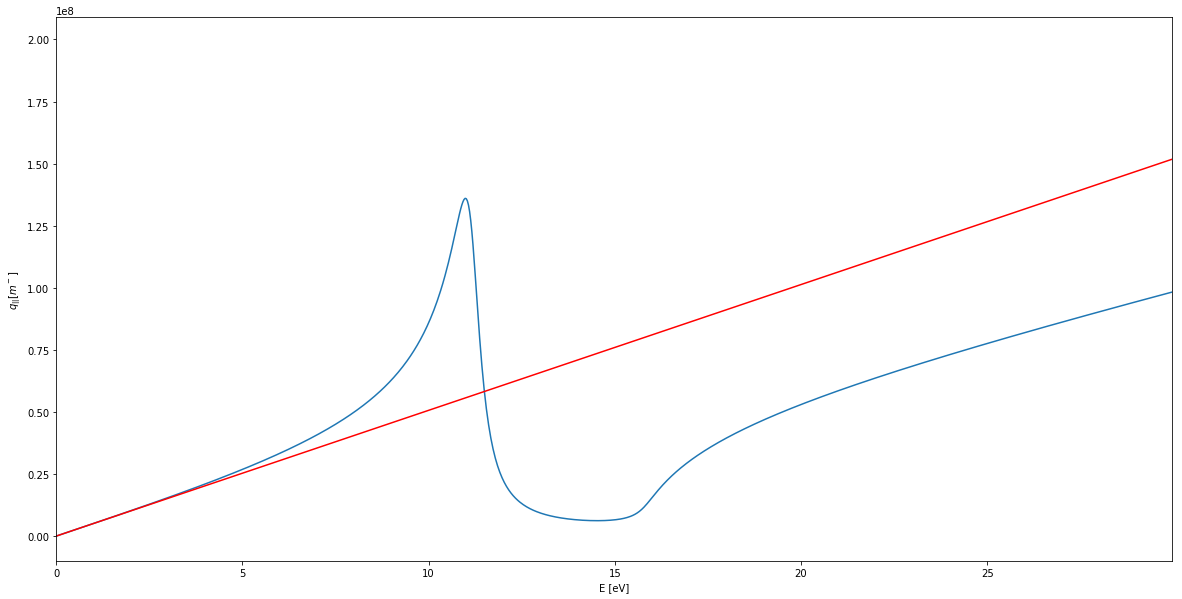

In [146]:
fig = plt.figure('dispersion', figsize=(20,10))
plt.plot(E[0,0,:],dispersion(material=materials, E=E)[0,0,:])
plt.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='red')
plt.xlim(np.amin(E),np.amax(E))
plt.xlabel('E [eV]')
plt.ylabel(r'$q_{||} [m^-]$')

plt.show()

Relativistic 2 (Wang)

In [47]:
interface_1, interface_2 = twoSlabParallel_2(microscope, material=materials,
                   x=x, q_perpendicular=q_perpendicular, E=E)

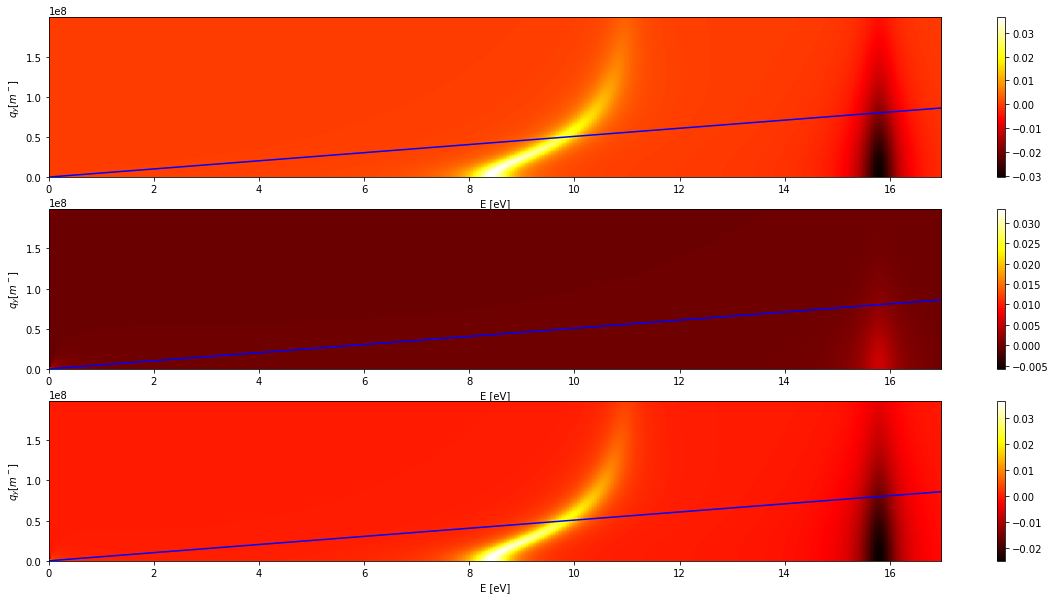

In [138]:
fig_wang, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20,10))
img1 = ax1.imshow(interface_1[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
                 extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax1.set_xlabel('E [eV]')
ax1.set_ylabel(r'$q_{y} [m^-]$')
ax1.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='blue')
fig.colorbar(img1, ax=ax1)
ax1.set_xlim(np.amin(E),np.amax(E))

img2 = ax2.imshow(interface_2[pos_index,:,:], aspect='auto', origin='lower', cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax2.set_xlabel('E [eV]')
ax2.set_ylabel(r'$q_{y} [m^-]$')
ax2.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='blue')
fig.colorbar(img2, ax=ax2)
ax2.set_xlim(np.amin(E),np.amax(E))

img3 = ax3.imshow(interface_1[pos_index,:,:]+interface_2[pos_index,:,:], aspect='auto', origin='lower',
                  cmap=plt.get_cmap('hot'),
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax3.set_xlabel('E [eV]')
ax3.set_ylabel(r'$q_{y} [m^-]$')
fig.colorbar(img3, ax=ax3)
ax3.plot(q_perpendicular[0,:,0]*c*hbar, q_perpendicular[0,:,0], color='blue')
ax3.set_xlim(np.amin(E),np.amax(E))

plt.show()

In [139]:
fig_wang.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/interfaceMode_Wang_E1E-3to17eV_q0to2um.jpg', bbox_inches='tight', dpi=800)

# compare

In [ ]:
fig_compare, [ax1, ax2] = plt.subplots(2, 1, figsize=(20,10))
img1 = ax1.imshow(interface_s[pos_index,:,:]+interface_p[pos_index,:,:], aspect='auto', origin='lower',
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax1.set_xlabel('E [eV]')
ax1.set_ylabel(r'$q_{y} [m^-]$')

img2 = ax2.imshow(interface_1[pos_index,:,:]+interface_2[pos_index,:,:], aspect='auto', origin='lower',
             extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
ax2.set_xlabel('E [eV]')
ax2.set_ylabel(r'$q_{y} [m^-]$')

plt.show()

figs to save

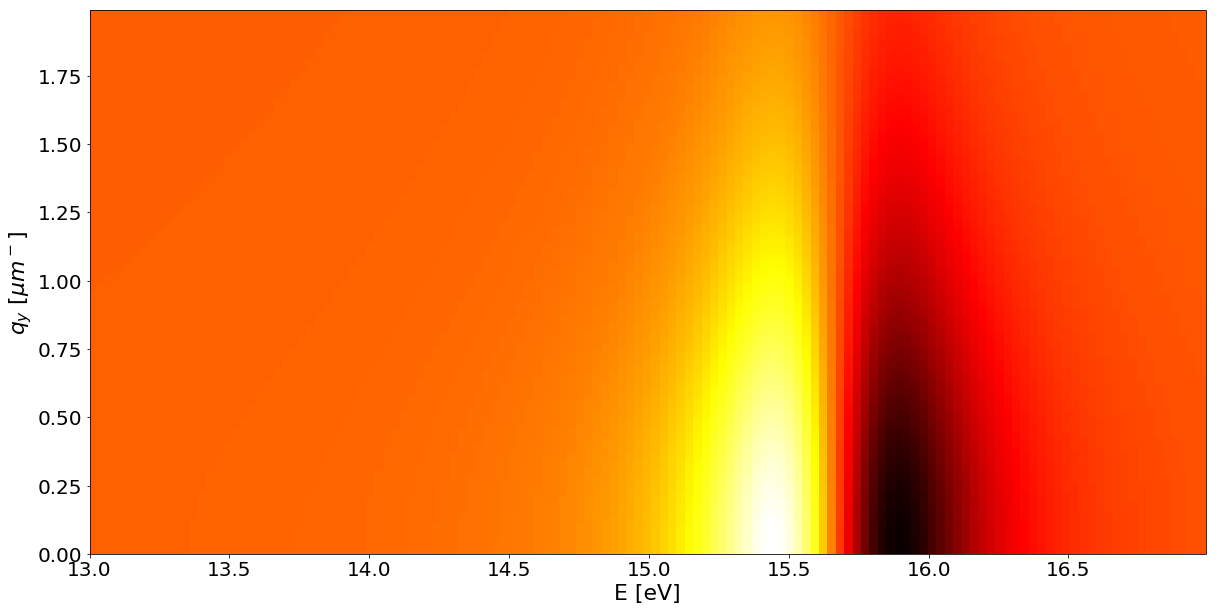

In [48]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,10))
img1 = plt.pcolor(E[pos_index,:,:], q_perpendicular[pos_index,:,:]/1E8, interface_1[pos_index,:,:]+interface_2[pos_index,:,:],
                  cmap=plt.get_cmap('hot'))
#ax1.imshow(interface_s[pos_index,:,:]+interface_p[pos_index,:,:], aspect='auto', origin='lower',
        #     extent=(np.amin(E),np.amax(E), np.amin(q_perpendicular), np.amax(q_perpendicular)))
plt.setp(ax1.get_xticklabels(), fontsize=20)
plt.setp(ax1.get_yticklabels(), fontsize=20)
ax1.set_xlabel('E [eV]', fontsize=22)
ax1.set_ylabel(r'$q_{y}\ [\mu m^-]$', fontsize=22)
plt.show()

In [49]:
fig.savefig('C:/Users/erhog/Google Drive/Research/Simulations_electrodynamic/interfaceModeTotal_E13to17eV_q0to2um.jpg', bbox_inches='tight', dpi=800)